## Import Library

In [1]:
import pandas as pd
import os
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import requests

In [2]:
nltk.data.path.append(os.path.expanduser("~/nltk_data")) # Menentukan direktori NLTK
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Loading Dataset

In [3]:
data = pd.read_csv("gojekdf.csv")
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,595da86c-acc1-4a64-ae43-90ff85eaf53d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,terlalu terlalu terlalu... apk yg tidak bisa d...,1,1,4.31.1,2022-04-21 13:37:07,"Hai, mohon maaf atas kendala yang kamu alami. ...",2022-04-22 01:33:31,4.31.1
1,9f871c14-7d44-4f0d-8cbe-9904d42cf3b6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Gak usah pasang tarif tarif hemat, soalnya par...",1,204,5.14.2,2025-03-21 14:44:12,"Hai Kak Evi, mohon maaf atas ketidaknyamananny...",2025-03-21 15:05:01,5.14.2
2,825e4595-c073-4388-8229-415e372b6c01,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tinggal 2menit lg driver sampe di lokasi tiba-...,1,91,5.14.2,2025-03-26 00:35:56,"Hai Kak Wahyu, mohon maaf atas ketidaknyamanan...",2025-03-26 04:26:47,5.14.2
3,05536ac2-95a2-446a-878a-09a36c36e5a5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tolong sistem pencarian otomatisnya kalo udah ...,3,16,5.14.2,2025-04-01 09:11:12,"Hai Kak Febry, mohon maaf atas ketidaknyamanan...",2025-04-01 09:37:20,5.14.2
4,bd0d000e-8173-4387-8839-15f43af6c9ba,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Beberapa driver ada yang nggak membaca pesan d...,2,13,5.14.2,2025-03-31 08:23:45,"Hai Kak Ferdiansyah, mohon maaf atas ketidakny...",2025-03-31 08:48:42,5.14.2
...,...,...,...,...,...,...,...,...,...,...,...
112495,bbb66254-0c14-4491-bbae-c5a751bc0baa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Teruntuk kamu gojek.. ojol kesayangan, tolong ...",3,0,NaN,2019-10-24 06:34:43,NaN,NaN,NaN
112496,eb92ee5d-efb9-49cb-9157-2c9143c89c0f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Selalu ada masalah. Beli kuota via gopay uang ...,1,0,NaN,2021-12-08 00:59:17,"Hai Krisna Adi, mohon maaf atas kendala yang k...",2021-12-09 05:32:17,NaN
112497,9650ffee-8153-4712-9ed9-90c142908c2d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Makin di permudah dan d percepat lagi ya,,,? J...",5,2,3.40.2,2019-11-06 17:38:23,NaN,NaN,3.40.2
112498,5113ac84-c88b-4e69-8b2e-b89042e41714,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ambil untungnya kebanyakan woy, potong driver ...",1,0,NaN,2021-07-03 15:31:45,"Hai, mohon maaf untuk kendalanya. Laporan yang...",2021-07-04 01:34:51,NaN


**Insight:** Dataset yang digunakan merupakan hasil scrapping dari aplikasi Gojek di Play Store dengan informasi 11 kolom yang di dapat berupa reviewId, userName, userImage, content, score, thumbsUpCount, reviewCreatedVersion, at, 	replyContent, repliedAt, dan appVersion

# Preprocessing

In [4]:
# Ambil kolom content dan hapus baris yang memiliki nilai yang hilang (NaN)
data = data[['content']].dropna()

In [5]:
# Menghapus baris duplikat
data = data.drop_duplicates()

In [6]:
# Daftar stopwords
link_stopwords = "https://raw.githubusercontent.com/stopwords-iso/stopwords-id/master/stopwords-id.txt"

# Daftar stopwords dari link
response = requests.get(link_stopwords)
daftar_stopwords = set(response.text.split("\n"))


In [7]:
slangwords = {
    "@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"
}

try:
    daftar_stopwords = set(stopwords.words("daftar"))
except:
    nltk.download("stopwords")

  # Alternatif tambahan stopwords
    link_stopwords = "https://raw.githubusercontent.com/stopwords-iso/stopwords-id/master/stopwords-id.txt"
    response = requests.get(link_stopwords)
    daftar_stopwords = set(response.text.split("\n"))

def clean_text_nltk(text):
    # Lowercasing
    text = text.lower()

    # Menghapus data URL
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)

    # Menghapus angka dan tanda baca
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenizer
    tokenizer = RegexpTokenizer(r"\w+")
    words = tokenizer.tokenize(text)

    # Normalisasi slangwords
    words = [slangwords[word] if word in slangwords else word for word in words]

    # Hapus stopwords
    words = [word for word in words if word not in daftar_stopwords]

    # Menggabungkan kalimat menjadi kalimat akhir
    return " ".join(words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Tambahkan ke dalam content
data["text_akhir"] = data["content"].astype(str).apply(clean_text_nltk)

In [11]:
data.head()

,content,text_akhir
0,terlalu terlalu terlalu... apk yg tidak bisa d...,apk percaya kuota cepat habis update bug hp la...
1,"Gak usah pasang tarif tarif hemat, soalnya par...",gak pasang tarif tarif hemat driver nya gak am...
2,tinggal 2menit lg driver sampe di lokasi tiba-...,tinggal menit driver lokasi tibatiba dibatalin...
3,tolong sistem pencarian otomatisnya kalo udah ...,tolong sistem pencarian otomatisnya driver men...
4,Beberapa driver ada yang nggak membaca pesan d...,driver membaca pesan memilih panggilan telefon...


## Pelabelan

In [9]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [12]:
import re

def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    # Bersihkan teks: lowercase, hapus tanda baca
    text = re.sub(r'[^\w\s]', '', text.lower())
    words = text.split()

    for word in words:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score += lexicon_negative[word]  # Tambahkan, karena nilainya negatif

    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity


In [13]:
data["sentiment"] = data["text_akhir"].apply(sentiment_analysis_lexicon_indonesia)
data.head()


,content,text_akhir,sentiment
0,terlalu terlalu terlalu... apk yg tidak bisa d...,apk percaya kuota cepat habis update bug hp la...,"(-12, negative)"
1,"Gak usah pasang tarif tarif hemat, soalnya par...",gak pasang tarif tarif hemat driver nya gak am...,"(9, positive)"
2,tinggal 2menit lg driver sampe di lokasi tiba-...,tinggal menit driver lokasi tibatiba dibatalin...,"(-1, negative)"
3,tolong sistem pencarian otomatisnya kalo udah ...,tolong sistem pencarian otomatisnya driver men...,"(-14, negative)"
4,Beberapa driver ada yang nggak membaca pesan d...,driver membaca pesan memilih panggilan telefon...,"(0, neutral)"


In [14]:
# Pisahkan tuple (score, polarity) ke dalam dua kolom baru
data[['sentiment_score', 'sentiment_label']] = pd.DataFrame(data['sentiment'].tolist(), index=data.index)

# Import LabelEncoder dan buat objeknya
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Encode label sentimen menjadi angka
data['sentiment_encoded'] = encoder.fit_transform(data['sentiment_label'])

# Cek hasil
print(data[['sentiment_score', 'sentiment_label', 'sentiment_encoded']].head())

# Simpan mapping untuk referensi
sentiment_dict = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Pemetaan Sentimen:", sentiment_dict)


   sentiment_score sentiment_label  sentiment_encoded
0              -12        negative                  0
1                9        positive                  2
2               -1        negative                  0
3              -14        negative                  0
4                0         neutral                  1
Pemetaan Sentimen: {'negative': np.int64(0), 'neutral': np.int64(1), 'positive': np.int64(2)}


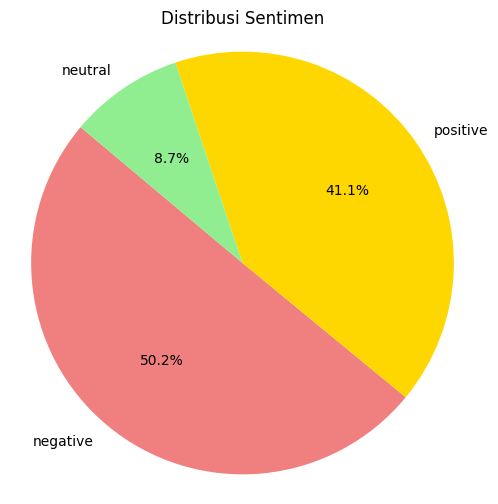

In [15]:
import matplotlib.pyplot as plt

# Hitung jumlah tiap label sentimen
sentiment_counts = data['sentiment_label'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
colors = ['lightcoral', 'gold', 'lightgreen']  # warna untuk negatif, netral, positif
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribusi Sentimen')
plt.axis('equal')  # Biar pie chart-nya bulat
plt.show()


**Insight:** Berdasarkan pie chart distribusi sentimen, mayoritas data menunjukkan sentimen negatif sebesar 50.2%, diikuti oleh sentimen positif sebesar 41.1%, dan netral hanya 8.7%. Hal ini mengindikasikan bahwa opini dalam dataset cenderung lebih banyak mengandung ekspresi ketidakpuasan atau kritik dibandingkan dengan tanggapan positif atau netral.

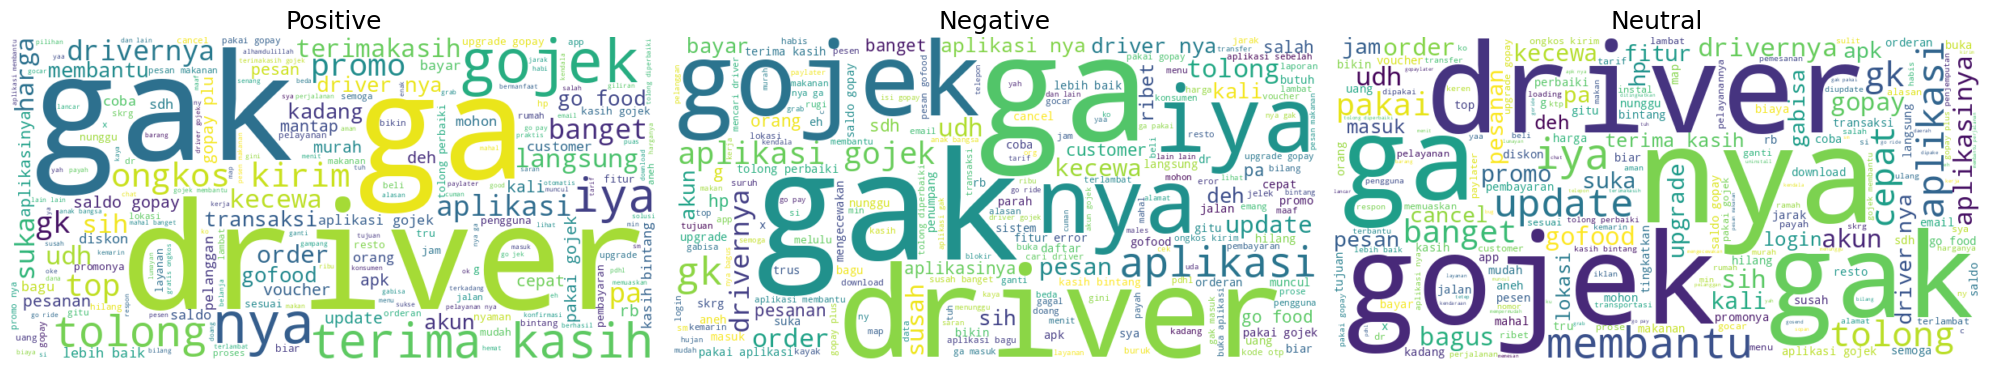

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan teks dari masing-masing sentimen
text_positive = ' '.join(data[data['sentiment_label'] == 'positive']['text_akhir'])
text_negative = ' '.join(data[data['sentiment_label'] == 'negative']['text_akhir'])
text_neutral  = ' '.join(data[data['sentiment_label'] == 'neutral']['text_akhir'])

# Buat WordCloud masing-masing
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(text_positive)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(text_negative)
wordcloud_neu = WordCloud(width=800, height=400, background_color='white').generate(text_neutral)

# Tampilkan semuanya dalam 1 baris
plt.figure(figsize=(20, 6))

# Positive
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Positive", fontsize=18)
plt.axis('off')

# Negative
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Negative", fontsize=18)
plt.axis('off')

# Neutral
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.title("Neutral", fontsize=18)
plt.axis('off')

# Tampilkan hasilnya
plt.tight_layout()
plt.show()


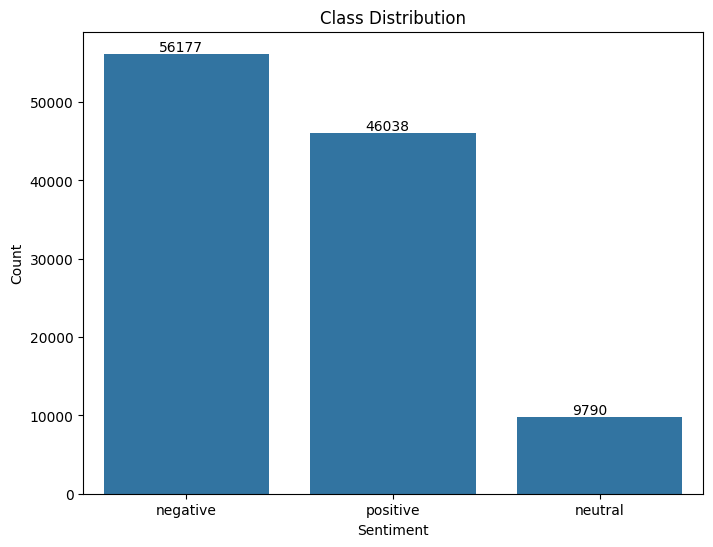

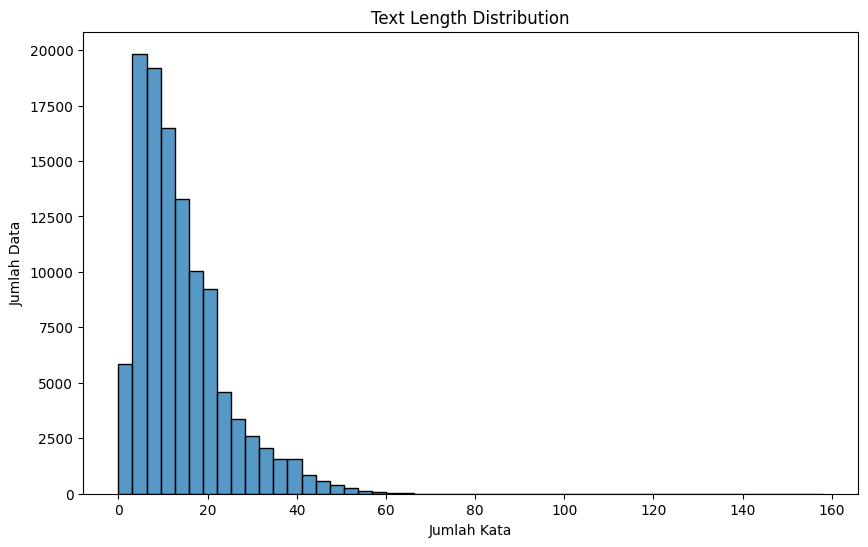

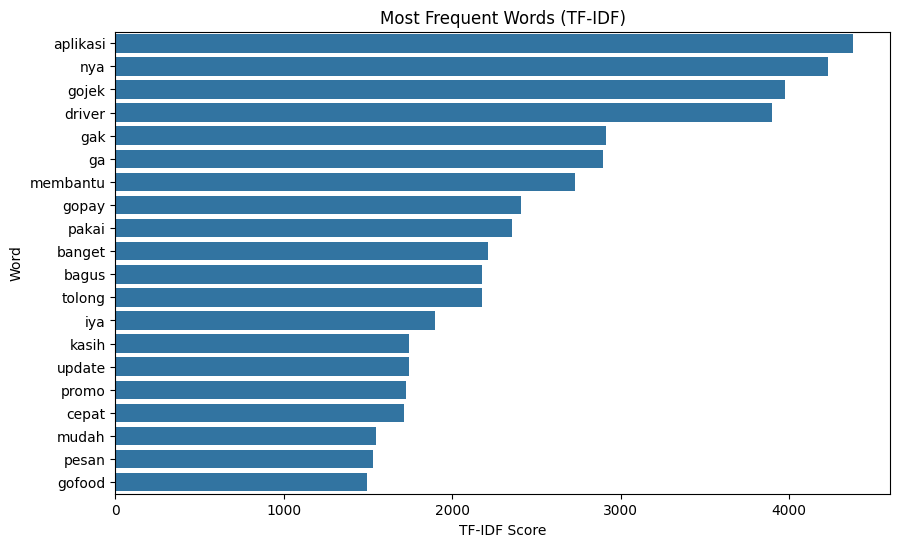

In [18]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# --- 1. Barplot: Distribusi Label Sentimen ---
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='sentiment_label', order=data['sentiment_label'].value_counts().index)
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 3, p.get_height() + 300),
                fontsize=10)
plt.show()

# --- 2. Histogram: Distribusi Panjang Teks ---
data['text_length'] = data['text_akhir'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=50, kde=False)
plt.title("Text Length Distribution")
plt.xlabel("Jumlah Kata")
plt.ylabel("Jumlah Data")
plt.show()

# --- 3. Top 20 Kata Paling Dominan (berdasarkan TF-IDF) ---
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(data['text_akhir'])

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df.columns = ['word', 'jumlah']
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(y='word', x='jumlah', data=tfidf_df)
plt.title('Most Frequent Words (TF-IDF)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()

**Insight** Berdasarkan visualisasi distribusi kelas sentimen, terlihat bahwa mayoritas data bersentimen negatif sebanyak 56.177 ulasan, diikuti oleh sentimen positif sebanyak 46.038 ulasan, dan sentimen netral yang jumlahnya jauh lebih sedikit, yakni 9.790 ulasan.Analisis TF-IDF menunjukkan kata-kata yang paling sering muncul dalam korpus ulasan, seperti aplikasi, gojek, driver, dan gopay, menandakan fokus pengguna terhadap fitur utama layanan.

# Data Splitting

In [ ]:
!pip uninstall -y gensim

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.25.2

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 30.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.


In [ ]:
!pip uninstall -y tensorflow
!pip install tensorflow==2.15.0

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempti

In [ ]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = data["text_akhir"]
y = data["sentiment_encoded"]

# Skema 1 (70:30)
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

# Skema 2 dan 3 (80:20)
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Ekstraksi fitur dengan TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
train_70_tfidf = tfidf_vectorizer.fit_transform(X_train_70)
test_30_tfidf = tfidf_vectorizer.transform(X_test_30)

train_80_tfidf = tfidf_vectorizer.fit_transform(X_train_80)
test_20_tfidf = tfidf_vectorizer.transform(X_test_20)

In [ ]:
# Ekstraksi fitur dengan Word2Vec

# Tokenisasi Word2Vec
X_tokenized = [text.split() for text in X]

# Training Word2Vec
model_word2vec = Word2Vec(sentences=X_tokenized, vector_size=50, window=10, min_count=2, workers=4)
model_word2vec.train(X_tokenized, total_examples=len(X_tokenized), epochs=10)

# Konversi teks ke vektor Word2Vec
def get_word2vec_vector(text):
    words = text.split()
    word_vectors = [model_word2vec.wv[word] for word in words if word in model_word2vec.wv]
    if len(word_vectors) == 0:
        return np.zeros(model_word2vec.vector_size)  # Gunakan vector_size yang sama
    return np.mean(word_vectors, axis=0)

# Pastikan semua vektor memiliki dimensi yang sama
assert model_word2vec.vector_size == 50

# Konversi X_train dan X_test ke Word2Vec
train_70_w2v = np.array([get_word2vec_vector(text) for text in X_train_70])
test_30_w2v = np.array([get_word2vec_vector(text) for text in X_test_30])

train_80_w2v = np.array([get_word2vec_vector(text) for text in X_train_80])
test_20_w2v = np.array([get_word2vec_vector(text) for text in X_test_20])



# Pemodelan Machine Learning (ML) klasik

**Model SVM dengan TF-IDF (80:20)**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

svm = SVC(kernel="linear", C=3, random_state=42)
svm.fit(train_80_tfidf, y_train_80)
y_pred_svm = svm.predict(test_20_tfidf)
print("SVM dengan TF-IDF (80:20):")
print(classification_report(y_test_20, y_pred_svm))
print("Training Accuracy:", accuracy_score(y_train_80, svm.predict(train_80_tfidf)))
print("Testing Accuracy:", accuracy_score(y_test_20, y_pred_svm))


SVM dengan TF-IDF (80:20):
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     11232
           1       0.78      0.54      0.64      1993
           2       0.93      0.95      0.94      9176

    accuracy                           0.92     22401
   macro avg       0.88      0.82      0.84     22401
weighted avg       0.92      0.92      0.92     22401

Training Accuracy: 0.9405048881746351
Testing Accuracy: 0.9208517476898352


Model SVM dengan TF-IDF pada pembagian data 80% training dan 20% testing  menunjukkan performa yang baik dengan akurasi pelatihan sebesar 94.05% dan akurasi pengujian 92.08% yang mengindikasikan model tidak overfitting dan mencerminkan kemampuan model dalam melakukan klasifikasi yang akurat dan efektif.

# Pemodelan Deep Learning (DL)

**GRU Embedding (80:20)**

In [ ]:
# Import pustaka yang diperlukan
import tensorflow as tf
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Konfigurasi parameter inti
jumlah_kata = 2000            # Batas maksimum jumlah kata unik yang diproses
dimensi_embedding = 50        # Ukuran dimensi representasi kata (embedding)
panjang_maksimal = 50         # Panjang maksimal setiap teks yang dianalisis
token_tidak_dikenal = "<OOV>" # Penanda untuk kata di luar kosakata

# Proses pengkodean teks (Tokenisasi)
tokenizer = Tokenizer(num_words=jumlah_kata, oov_token=token_tidak_dikenal)
tokenizer.fit_on_texts(data["text_akhir"])  # Membuat indeks kata dari korpus

# Mengubah teks menjadi urutan angka
urutan_teks = tokenizer.texts_to_sequences(data["text_akhir"])
urutan_teks_padded = pad_sequences(urutan_teks, maxlen=panjang_maksimal, padding="post", truncating="post")

# Menyusun label ke dalam array
label = data["sentiment_encoded"].values

# Pemisahan data menjadi data latih dan data uji (80% : 20%)
X_data_latih, X_data_uji, y_data_latih, y_data_uji = train_test_split(urutan_teks_padded, label, test_size=0.2, random_state=42)

# Membangun model RNN berbasis GRU (Gated Recurrent Unit)
model_gru = Sequential([
    Embedding(input_dim=jumlah_kata, output_dim=dimensi_embedding, input_length=panjang_maksimal),
    GRU(units=64, return_sequences=True),
    GRU(units=32),
    Dense(units=64, activation="relu"),
    Dropout(rate=0.2),
    Dense(units=3, activation="softmax")  # 3 output kelas untuk kategori sentimen
])

# Proses kompilasi model (menentukan fungsi loss, algoritma optimasi, dan metrik evaluasi)
model_gru.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

# Proses pelatihan model
histori_gru = model_gru.fit(X_data_latih, y_data_latih,
                            epochs=12,
                            batch_size=32,
                            validation_data=(X_data_uji, y_data_uji))

# Evaluasi performa model
akurasi_latih = model_gru.evaluate(X_data_latih, y_data_latih)[1]
akurasi_uji = model_gru.evaluate(X_data_uji, y_data_uji)[1]

print("Training Accuracy:", akurasi_latih)
print("Testing Accuracy:", akurasi_uji)


Epoch 1/12
2801/2801 [==============================] - 97s 34ms/step - loss: 0.6191 - accuracy: 0.7050 - val_loss: 0.3007 - val_accuracy: 0.8934
Epoch 2/12
2801/2801 [==============================] - 89s 32ms/step - loss: 0.2451 - accuracy: 0.9171 - val_loss: 0.2424 - val_accuracy: 0.9175
Epoch 3/12
2801/2801 [==============================] - 90s 32ms/step - loss: 0.2152 - accuracy: 0.9294 - val_loss: 0.2145 - val_accuracy: 0.9321
Epoch 4/12
2801/2801 [==============================] - 91s 32ms/step - loss: 0.2018 - accuracy: 0.9344 - val_loss: 0.2075 - val_accuracy: 0.9346
Epoch 5/12
2801/2801 [==============================] - 90s 32ms/step - loss: 0.1928 - accuracy: 0.9373 - val_loss: 0.2178 - val_accuracy: 0.9301
Epoch 6/12
2801/2801 [==============================] - 90s 32ms/step - loss: 0.1844 - accuracy: 0.9400 - val_loss: 0.2188 - val_accuracy: 0.9288
Epoch 7/12
2801/2801 [==============================] - 89s 32ms/step - loss: 0.1779 - accuracy: 0.9419 - val_loss: 0.2101 -

In [ ]:
from sklearn.metrics import classification_report

# Prediksi probabilitas pada data uji
y_pred_prob = model_gru.predict(X_data_uji)

# Mengambil kelas dengan probabilitas tertinggi
y_pred = np.argmax(y_pred_prob, axis=1)

# Tampilkan classification report
print(classification_report(y_data_uji, y_pred, digits=4))


701/701 [==============================] - 6s 7ms/step
              precision    recall  f1-score   support

           0     0.9465    0.9523    0.9494     11232
           1     0.7732    0.7561    0.7646      1993
           2     0.9465    0.9440    0.9452      9176

    accuracy                         0.9314     22401
   macro avg     0.8887    0.8841    0.8864     22401
weighted avg     0.9311    0.9314    0.9312     22401



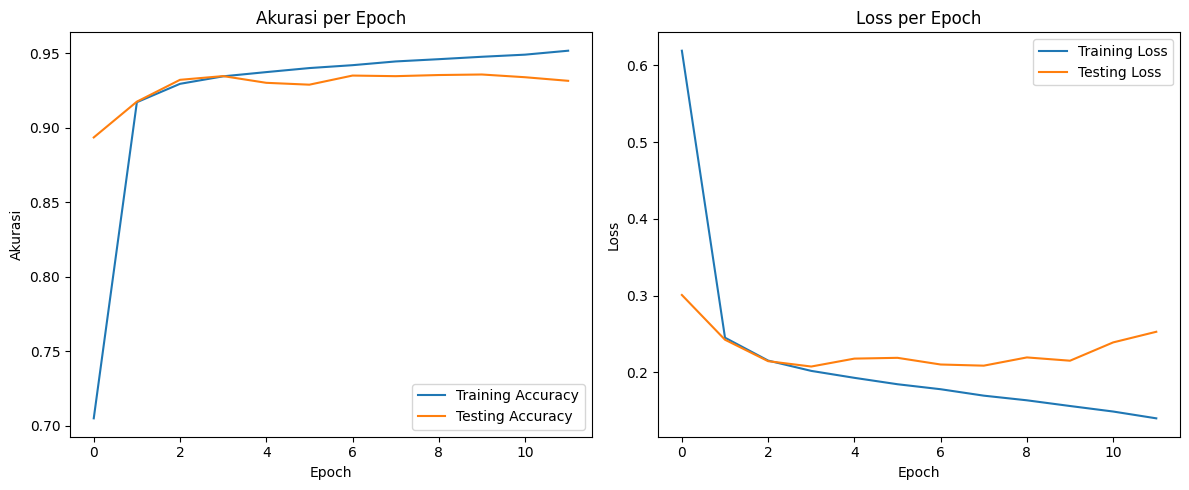

In [ ]:
# Plot Akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(histori_gru.history['accuracy'], label='Training Accuracy')
plt.plot(histori_gru.history['val_accuracy'], label='Testing Accuracy')
plt.title('Akurasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(histori_gru.history['loss'], label='Training Loss')
plt.plot(histori_gru.history['val_loss'], label='Testing Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Model GRU dengan pendekatan embedding berhasil mencapai akurasi pelatihan sebesar 95.63% dan akurasi pengujian sebesar 93.14%, menunjukkan generalisasi yang baik. Pada kelas 0 (sentimen negatif), model menunjukkan performa tertinggi dengan precision 0.9465 dan recall 0.9494. Meskipun performa pada kelas 1 (sentimen netral) sedikit lebih rendah, secara keseluruhan model memberikan hasil yang kuat. Grafik menunjukkan bahwa akurasi model meningkat dan stabil seiring bertambahnya epoch, dengan akurasi pelatihan sedikit lebih tinggi dari pengujian. Sementara itu, grafik loss menunjukkan bahwa nilai loss pelatihan terus menurun, tetapi loss pengujian cenderung datar dan sedikit meningkat setelah beberapa epoch. Hal ini mengindikasikan model memiliki performa yang baik dan pendekatan GRU mampu menangkap pola sekuensial dalam teks dengan efektif.

**GRU dengan Word2Vec (70:30)**

In [ ]:
# Membuat Matriks Representasi Kata berbasis Word2Vec
matriks_embedding = np.zeros((jumlah_kata, dimensi_embedding))
indeks_kata = tokenizer.word_index  # Kamus kata dan indeks dari hasil tokenisasi

# Mengisi matriks embedding dengan vektor dari model Word2Vec
for kata, indeks in indeks_kata.items():
    if indeks < jumlah_kata:
        try:
            matriks_embedding[indeks] = model_word2vec.wv[kata]
        except KeyError:
            matriks_embedding[indeks] = np.random.normal(scale=0.6, size=(dimensi_embedding,))

# Pemisahan data (70% untuk pelatihan, 30% untuk pengujian)
X_latih_w2v, X_uji_w2v, y_latih_w2v, y_uji_w2v = train_test_split(urutan_teks_padded, label, test_size=0.3, random_state=42)

# Arsitektur Model GRU yang memanfaatkan Word2Vec sebagai representasi kata
model_gru_w2v = Sequential([
    Embedding(input_dim=jumlah_kata,
              output_dim=dimensi_embedding,
              weights=[matriks_embedding],
              input_length=panjang_maksimal,
              trainable=False),
    GRU(units=64, return_sequences=True),
    GRU(units=32),
    Dense(units=64, activation="relu"),
    Dropout(rate=0.2),
    Dense(units=3, activation="softmax")  # Tiga kelas sentimen: positif, netral, negatif
])

# Menyusun model untuk pelatihan
model_gru_w2v.compile(loss="sparse_categorical_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])

# Proses pelatihan model
histori_gru_w2v = model_gru_w2v.fit(X_latih_w2v, y_latih_w2v,
                                    epochs=16,
                                    batch_size=32,
                                    validation_data=(X_uji_w2v, y_uji_w2v))

# Mengukur akurasi model pada data pelatihan dan pengujian
akurasi_latih_w2v = model_gru_w2v.evaluate(X_latih_w2v, y_latih_w2v)[1]
akurasi_uji_w2v = model_gru_w2v.evaluate(X_uji_w2v, y_uji_w2v)[1]

print("Training Accuracy:", akurasi_latih_w2v)
print("Testing Accuracy:", akurasi_uji_w2v)

Epoch 1/16
2451/2451 [==============================] - 80s 31ms/step - loss: 0.6744 - accuracy: 0.6987 - val_loss: 0.4838 - val_accuracy: 0.8128
Epoch 2/16
2451/2451 [==============================] - 77s 31ms/step - loss: 0.4378 - accuracy: 0.8363 - val_loss: 0.4183 - val_accuracy: 0.8419
Epoch 3/16
2451/2451 [==============================] - 77s 31ms/step - loss: 0.3874 - accuracy: 0.8570 - val_loss: 0.3936 - val_accuracy: 0.8503
Epoch 4/16
2451/2451 [==============================] - 79s 32ms/step - loss: 0.3609 - accuracy: 0.8672 - val_loss: 0.3904 - val_accuracy: 0.8536
Epoch 5/16
2451/2451 [==============================] - 78s 32ms/step - loss: 0.3396 - accuracy: 0.8754 - val_loss: 0.3922 - val_accuracy: 0.8579
Epoch 6/16
2451/2451 [==============================] - 77s 31ms/step - loss: 0.3231 - accuracy: 0.8817 - val_loss: 0.3722 - val_accuracy: 0.8617
Epoch 7/16
2451/2451 [==============================] - 76s 31ms/step - loss: 0.3086 - accuracy: 0.8866 - val_loss: 0.3821 -

In [ ]:
# Prediksi probabilitas pada data uji
y_pred_prob_w2v = model_gru_w2v.predict(X_uji_w2v)

# Mengambil kelas dengan probabilitas tertinggi
y_pred_w2v = np.argmax(y_pred_prob_w2v, axis=1)

# Menampilkan classification report
print(classification_report(y_uji_w2v, y_pred_w2v, digits=4))

1051/1051 [==============================] - 8s 8ms/step
              precision    recall  f1-score   support

           0     0.8997    0.8844    0.8920     16942
           1     0.5862    0.5010    0.5403      2952
           2     0.8547    0.8995    0.8765     13708

    accuracy                         0.8569     33602
   macro avg     0.7802    0.7616    0.7696     33602
weighted avg     0.8538    0.8569    0.8548     33602



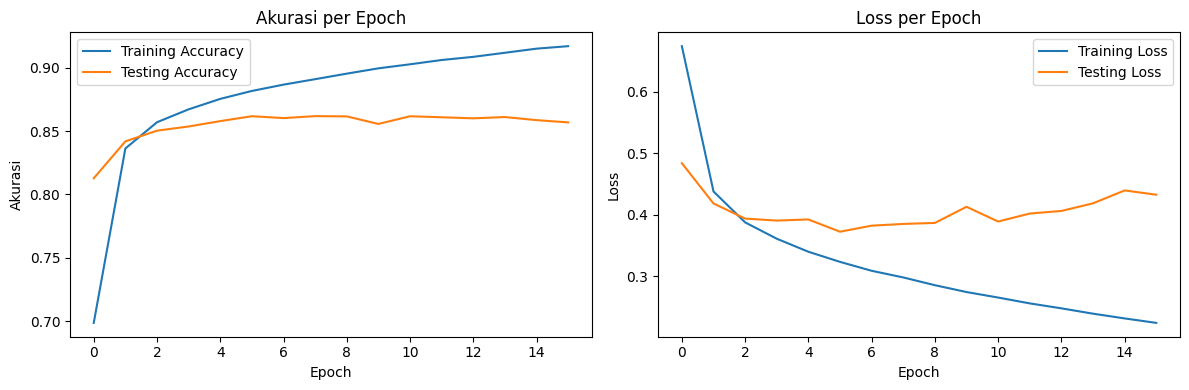

In [ ]:
# Visualisasi hasil training
plt.figure(figsize=(12, 4))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(histori_gru_w2v.history['accuracy'], label='Training Accuracy')
plt.plot(histori_gru_w2v.history['val_accuracy'], label='Testing Accuracy')
plt.title('Akurasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(histori_gru_w2v.history['loss'], label='Training Loss')
plt.plot(histori_gru_w2v.history['val_loss'], label='Testing Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Model GRU dengan pendekatan Word2Vec memiliki akurasi pelatihan sebesar 92.58% dan akurasi pengujian sebesar 85.68% yang menandakan adanya sedikit kemungkinan overfitting dilihat dari grafik loss. Hal ini menandakan bahwa kombinasi GRU dengan Word2Vec masih cukup efektif dalam memahami konteks kata dan urutan dalam teks, tetapi belum sebaik model GRU Embedding dan juga SVM TF-IDF.

**LSTM dengan Word embedding (80:20)**

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Parameter utama
jumlah_kata_lstm = 5000          # Batas jumlah kosakata unik yang digunakan oleh Tokenizer
dimensi_vektor_lstm = 50         # Ukuran dimensi vektor representasi kata
panjang_maksimal_lstm = 50       # Panjang maksimal setiap input teks
token_tidak_dikenal = "<OOV>"    # Token untuk kata yang tidak ada dalam kosakata pelatihan

# Tokenisasi Teks
tokenisasi_lstm = Tokenizer(num_words=jumlah_kata_lstm, oov_token=token_tidak_dikenal)
tokenisasi_lstm.fit_on_texts(data["text_akhir"])

# Mengubah teks menjadi urutan angka
urutan_lstm = tokenisasi_lstm.texts_to_sequences(data["text_akhir"])
urutan_lstm_padded = pad_sequences(urutan_lstm, maxlen=panjang_maksimal_lstm, padding="post", truncating="post")

# Label sentimen dikonversi ke format array
label_lstm = data["sentiment_encoded"].values

# Membagi dataset menjadi data pelatihan dan pengujian (80:20)
X_latih_lstm, X_uji_lstm, y_latih_lstm, y_uji_lstm = train_test_split(urutan_lstm_padded, label_lstm, test_size=0.2, random_state=42)

# Arsitektur Jaringan LSTM
model_lstm = Sequential([
    Embedding(input_dim=jumlah_kata_lstm, output_dim=dimensi_vektor_lstm, input_length=panjang_maksimal_lstm, trainable=True),  # Tanpa pre-trained
    LSTM(units=64, return_sequences=True),
    LSTM(units=32),
    Dense(units=64, activation="relu"),
    Dropout(rate=0.2),
    Dense(units=3, activation="softmax")  # Klasifikasi menjadi 3 jenis sentimen
])

# Menyusun model untuk proses pelatihan
model_lstm.compile(loss="sparse_categorical_crossentropy",
                   optimizer="adam",
                   metrics=["accuracy"])

# Melatih model
histori_lstm = model_lstm.fit(X_latih_lstm, y_latih_lstm,
                              epochs=12,
                              batch_size=32,
                              validation_data=(X_uji_lstm, y_uji_lstm))

# Evaluasi performa model
akurasi_latih_lstm = model_lstm.evaluate(X_latih_lstm, y_latih_lstm)[1]
akurasi_uji_lstm = model_lstm.evaluate(X_uji_lstm, y_uji_lstm)[1]

print("Training Accuracy:", akurasi_latih_lstm)
print("Testing Accuracy:", akurasi_uji_lstm)


Epoch 1/12
2801/2801 [==============================] - 102s 35ms/step - loss: 0.8765 - accuracy: 0.6008 - val_loss: 0.8722 - val_accuracy: 0.6206
Epoch 2/12
2801/2801 [==============================] - 97s 35ms/step - loss: 0.8683 - accuracy: 0.6245 - val_loss: 0.8689 - val_accuracy: 0.6220
Epoch 3/12
2801/2801 [==============================] - 96s 34ms/step - loss: 0.8635 - accuracy: 0.6301 - val_loss: 0.8649 - val_accuracy: 0.6279
Epoch 4/12
2801/2801 [==============================] - 98s 35ms/step - loss: 0.8587 - accuracy: 0.6359 - val_loss: 0.8624 - val_accuracy: 0.6310
Epoch 5/12
2801/2801 [==============================] - 96s 34ms/step - loss: 0.8552 - accuracy: 0.6392 - val_loss: 0.8629 - val_accuracy: 0.6285
Epoch 6/12
2801/2801 [==============================] - 97s 35ms/step - loss: 0.8696 - accuracy: 0.6074 - val_loss: 0.9275 - val_accuracy: 0.5014
Epoch 7/12
2801/2801 [==============================] - 97s 35ms/step - loss: 0.9248 - accuracy: 0.5016 - val_loss: 0.9271 

In [ ]:
# Prediksi probabilitas
y_pred_prob = model_lstm.predict(X_uji_lstm)

# Ambil label dengan probabilitas tertinggi
y_pred = np.argmax(y_pred_prob, axis=1)

# Tampilkan classification report
print(classification_report(y_uji_lstm, y_pred,
                            target_names=encoder.classes_, digits=4))

701/701 [==============================] - 7s 9ms/step
              precision    recall  f1-score   support

    negative     0.9620    0.9741    0.9680     11232
     neutral     0.8201    0.7501    0.7835      1993
    positive     0.9635    0.9665    0.9650      9176

    accuracy                         0.9511     22401
   macro avg     0.9152    0.8969    0.9055     22401
weighted avg     0.9500    0.9511    0.9504     22401



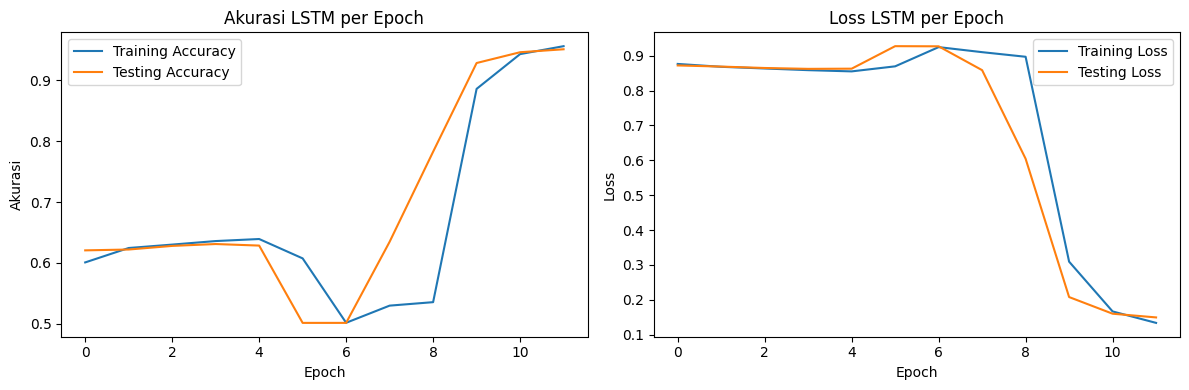

In [ ]:
# Visualisasi hasil training LSTM
plt.figure(figsize=(12, 4))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(histori_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(histori_lstm.history['val_accuracy'], label='Testing Accuracy')
plt.title('Akurasi LSTM per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(histori_lstm.history['loss'], label='Training Loss')
plt.plot(histori_lstm.history['val_loss'], label='Testing Loss')
plt.title('Loss LSTM per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Model LSTM dengan pendekatan Word Embedding menunjukkan performa yang sangat baik diantara model yang lain, dengan akurasi pelatihan sebesar 96.81% dan akurasi pengujian sebesar 95.10%. Hal ini menunjukkan bahwa kombinasi LSTM dan Word Embedding sangat efektif dalam menangkap pola sekuensial serta konteks kata dalam data teks. Model berhasil belajar dengan baik setelah beberapa epoch, dan kemungkinan besar tidak mengalami overfitting karena tren akurasi dan loss pada data pelatihan dan pengujian tetap sejalan.

# Kesimpulan

In [ ]:
# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['SVM dengan TF-IDF','GRU Embedding', 'GRU dengan Word2Vec', 'LSTM dengan Word embedding'],
    'Accuracy Train': [svm.score(train_80_tfidf, y_train_80), akurasi_latih , akurasi_latih_w2v, akurasi_latih_lstm],
    'Accuracy Test': [svm.score(test_20_tfidf, y_test_20), akurasi_uji, akurasi_uji_w2v, akurasi_uji_lstm]
})
# Menampilkan kolom Accuracy Train & Test
accuracy_train_test = results_df[['Model', 'Accuracy Train', 'Accuracy Test']]
print(accuracy_train_test)

                        Model  Accuracy Train  Accuracy Test
0           SVM dengan TF-IDF        0.940505       0.920852
1               GRU Embedding        0.956375       0.931432
2         GRU dengan Word2Vec        0.925819       0.856854
3  LSTM dengan Word embedding        0.968171       0.951074


In [ ]:
# Mengurutkan berdasarkan akurasi test dari tertinggi ke terendah
accuracy_train_test_sorted = accuracy_train_test.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan hasil yang sudah diurutkan
print(accuracy_train_test_sorted)


                        Model  Accuracy Train  Accuracy Test
3  LSTM dengan Word embedding        0.968171       0.951074
1               GRU Embedding        0.956375       0.931432
0           SVM dengan TF-IDF        0.940505       0.920852
2         GRU dengan Word2Vec        0.925819       0.856854


Model LSTM dengan Word Embedding adalah model terbaik dalam analisis sentimen untuk aplikasi Gojek berdasarkan akurasi. Algoritma LSTM dengan pendekatan Word Embedding mencapai akurasi tertinggi sebesar 96,81% pada data training dan 95.10% pada data testing. Terlihat juga bahwa beberapa model deep learning memiliki akurasi yang lebih tinggi dari model Machine learning klasik. Oleh karena itu, algoritma LSTM dengan Word Embedding dipilih sebagai model utama yang akan digunakan untuk memprediksi sentimen pada kalimat-kalimat baru.



In [ ]:
# Simpan model ke file .h5
model_lstm.save("model_lstm_wordembedding.h5")

# Simpan Tokenizer ke file .pkl
import pickle
with open("tokenizer_lstm.pkl", "wb") as f:
    pickle.dump(tokenisasi_lstm, f)


In [ ]:
!pip freeze > requirements.txt
